We begin by importing the libraries necessary for our task. OpenCV is the main library used for image processing,
while Matplotlib helps us display the image.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

We use "cv2.imread()" to load the image from the same directory as our notebook. OpenCV loads images in BGR format by default, but "matplotlib" displays images in RGB, so we need to convert it before displaying.


In [2]:
image_path = "tf2_engineer.jpg" 
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

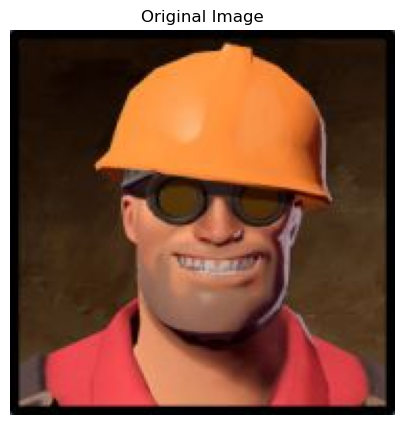

In [3]:
plt.figure(figsize=(5, 5))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

To find the centre, we get the image height and width and divide by 2. Then we print the BGR intensity value at that central pixel.


In [4]:
height, width, _ = image.shape
y_center, x_center = height // 2, width // 2
center_intensity = image[y_center, x_center]
print(f"Intensity at image center (BGR): {center_intensity}")

Intensity at image center (BGR): [ 67  92 172]


Now we draw a rectangle (30 pixels tall and 40 wide) around the center pixel. The color we use is "#329ea8"  which is converted from HEX to BGR format for OpenCV.


In [5]:
patch_height = 30
patch_width = 40
top_left_y = y_center - patch_height // 2
top_left_x = x_center - patch_width // 2
bottom_right_y = top_left_y + patch_height
bottom_right_x = top_left_x + patch_width

In [6]:
hex_color = "#329ea8"
rgb_color = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5)) 
bgr_color = rgb_color[::-1]

In [7]:
patched_image = image.copy()
cv2.rectangle(patched_image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), bgr_color, -1)

array([[[82, 77, 74],
        [30, 25, 22],
        [ 4,  0,  0],
        ...,
        [ 0,  0,  0],
        [24, 26, 27],
        [76, 78, 79]],

       [[36, 31, 28],
        [ 4,  1,  0],
        [ 4,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  1,  2],
        [29, 31, 32]],

       [[ 5,  1,  0],
        [ 4,  0,  0],
        [ 4,  0,  0],
        ...,
        [ 0,  0,  1],
        [ 0,  0,  1],
        [ 0,  1,  2]],

       ...,

       [[ 4,  2,  0],
        [ 4,  1,  0],
        [12, 11,  7],
        ...,
        [ 6,  4,  4],
        [ 4,  1,  0],
        [ 5,  2,  0]],

       [[34, 30, 25],
        [ 4,  1,  0],
        [ 7,  6,  2],
        ...,
        [ 5,  2,  0],
        [ 4,  1,  0],
        [39, 35, 30]],

       [[83, 79, 74],
        [26, 23, 18],
        [ 8,  5,  1],
        ...,
        [ 6,  3,  0],
        [25, 21, 16],
        [83, 79, 74]]], dtype=uint8)

After drawing the rectangle, we again check the intensity at the center. It should now reflect the color we applied

In [8]:
patch_center_intensity = patched_image[y_center, x_center]
print(f"Intensity at patch center (BGR): {patch_center_intensity}")

Intensity at patch center (BGR): [168 158  50]


Finally we show the modified image using Matplotlib after converting it back to RGB

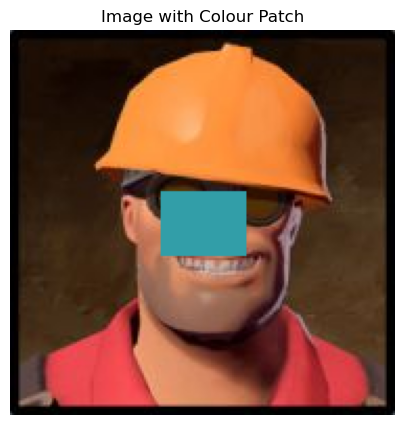

In [9]:
patched_image_rgb = cv2.cvtColor(patched_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.imshow(patched_image_rgb)
plt.title("Image with Colour Patch")
plt.axis("off")
plt.show()

This time we also add the "random" library for choosing random pixel locations.

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


We use "cv2.imread()" with "cv2.IMREAD_GRAYSCALE" for loading the image in grayscale mode. Then we use "matplotlib" to display it.


TypeError: Image data of dtype object cannot be converted to float

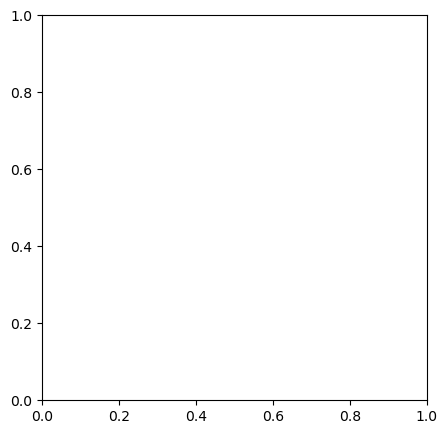

In [11]:
image = cv2.imread("einstein.tif", cv2.IMREAD_GRAYSCALE)# Load the image in grayscale mode

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()# Display the image


To create a negative image we should subtract each pixel value from 255.This inverts to opposite the brightness of every pixel


In [ ]:
negative_image = 255 - image


We now display the negative image using the same method we did above

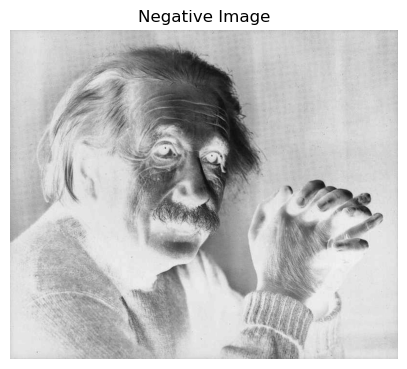

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(negative_image, cmap='gray')
plt.title("Negative Image")
plt.axis("off")
plt.show()


Now we will randomly select 5 pixel locations. After that we are going to print their intensity values in both the original and negative images to see how they differ

In [ ]:
height, width = image.shape #get image size

random_pixels = [(random.randint(0, height-1), random.randint(0, width-1)) for _ in range(5)]#select 5 random pixel coordinates


print("Pixel Comparison (Original vs Negative):")#print values before and after negation
for y, x in random_pixels:
    original_val = image[y, x]
    negative_val = negative_image[y, x]
    print(f"Pixel at (y={y}, x={x}): Original = {original_val}, Negative = {negative_val}")


Pixel Comparison (Original vs Negative):
Pixel at (y=4, x=326): Original = 107, Negative = 148
Pixel at (y=500, x=236): Original = 95, Negative = 160
Pixel at (y=126, x=587): Original = 104, Negative = 151
Pixel at (y=326, x=491): Original = 113, Negative = 142
Pixel at (y=124, x=470): Original = 117, Negative = 138


Same libraries Cv2 >> opencv , numpy and matplolib for other usable functions maybe

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


We load the image using "cv2.imread()" in grayscale mode and display it


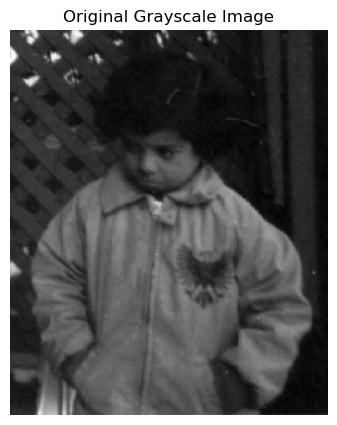

In [ ]:
image = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()


A log transform enhances dark regions in an image and compresses bright regions. Formula is :s = c * log(1 + r)
We can the result using "cv2.normalize" to keep pixel values in the 0–255 range



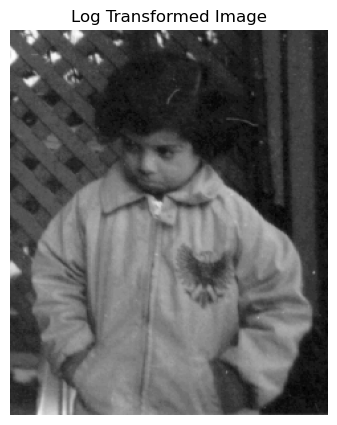

In [ ]:
image_float = np.float32(image)

log_image = cv2.normalize(np.log1p(image_float), None, 0, 255, cv2.NORM_MINMAX)
log_image = np.uint8(log_image)

plt.figure(figsize=(5, 5))
plt.imshow(log_image, cmap='gray')
plt.title("Log Transformed Image")
plt.axis("off")
plt.show()


To apply the transform safely did some operations. Explanied in code comments
np.expm1 : calculates exponential of all the elements subtracting 1 from all the input array elements

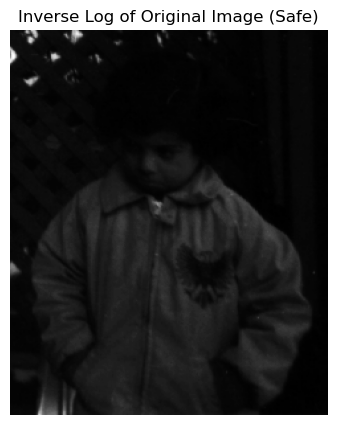

In [ ]:
scaled_image = image_float / 255.0 * 5  #Scaled down to prevent overflow 

inv_log_orig = np.expm1(scaled_image)# Apply inverse log transform safely 

# Normalize back to 0–255 and convert to uint8
inv_log_orig = cv2.normalize(inv_log_orig, None, 0, 255, cv2.NORM_MINMAX)
inv_log_orig = np.uint8(inv_log_orig)


plt.figure(figsize=(5, 5))
plt.imshow(inv_log_orig, cmap='gray')
plt.title("Inverse Log of Original Image (Safe)")
plt.axis("off")
plt.show()# Display result


Finally we must apply inverse log image to the log transformed image to see if we can recover the original

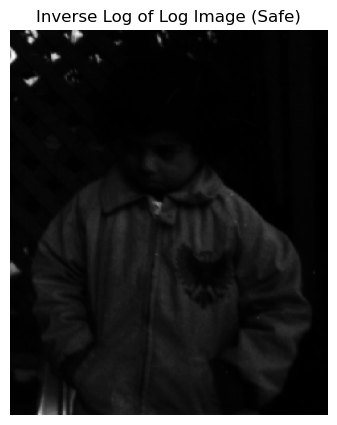

In [ ]:
log_image_float = np.float32(log_image)

scaled_log_image = log_image_float / 255.0 * 5  # we can use smaller values if neededd

inv_log_of_log = np.expm1(scaled_log_image) #To perform it safely 

inv_log_of_log = cv2.normalize(inv_log_of_log, None, 0, 255, cv2.NORM_MINMAX)
inv_log_of_log = np.uint8(inv_log_of_log)

plt.figure(figsize=(5, 5))
plt.imshow(inv_log_of_log, cmap='gray')
plt.title("Inverse Log of Log Image (Safe)")
plt.axis("off")
plt.show()


1st step: Libraries
Needed libraries we used opencv(cv2) for image processing
numpy for arithmetics and matplotlib for  showing images.
2nd step: Read the image in grayscale format then display it
*I couldn't use .tiff type in my notebook environment in this problem for some reason so i used .jpg*



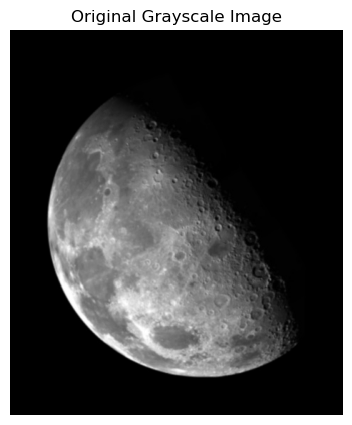

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('moon.jpg', cv2.IMREAD_GRAYSCALE)


if img is None:
    raise ValueError("failed upload") # to check if image is loaded properly this time

# Display
plt.figure(figsize=(5, 5))
plt.title("Original Grayscale Image")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


Generel Idea for this code :
We’ll apply the formula: g(x,y)=f(x,y)+k⋅mask(x,y)
Where:
f(x,y): original image
mask = original − blurred image
k: sharpening strength which we will try this time ( 0.3 , 0.6 , 1.4) 

Used gaussian blur function from openCV libs, later defined k values




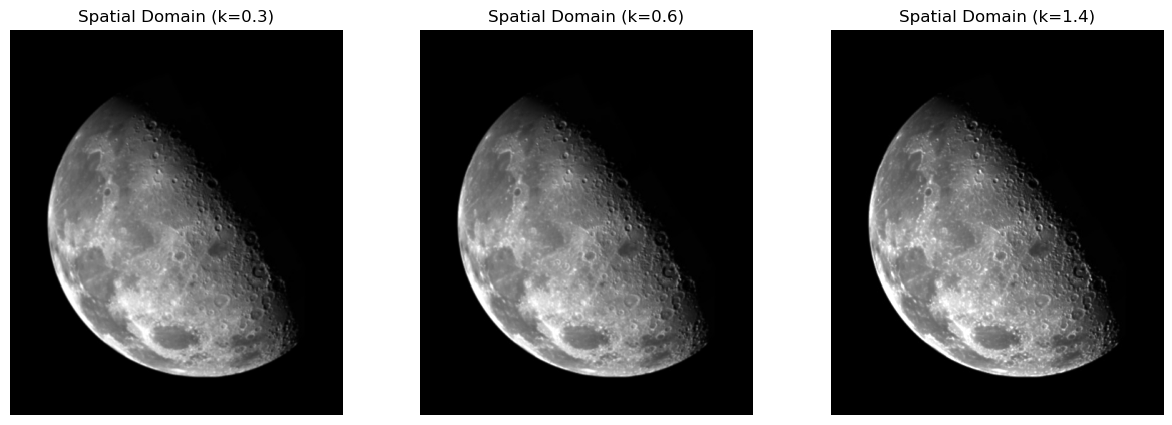

In [ ]:
# Gaussian blur to create mask
blurred = cv2.GaussianBlur(img, (9, 9), 2)
mask = cv2.subtract(img, blurred)

# Define k values
ks = [0.3, 0.6, 1.4]

spatial_results = []

plt.figure(figsize=(15, 5))
for i, k in enumerate(ks):
    sharpened = cv2.add(img, (k * mask).astype(np.uint8))
    spatial_results.append(sharpened)

    plt.subplot(1, 3, i + 1)
    plt.title(f'Spatial Domain (k={k})')
    plt.imshow(sharpened, cmap='gray')
    plt.axis('off')

plt.show()


As we see above the k value and sharpness is directly proportional :)

Unsharp masking in frequency domain

In [ ]:
def create_high_pass_filter(shape, D0):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    H = np.zeros((rows, cols), dtype=np.float32)

    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            H[u, v] = 1 if D > D0 else 0
    return H

def unsharp_masking_freq(img, k, D0):
    img_float = np.float32(img)
    dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    H = create_high_pass_filter(img.shape, D0)
    H = np.stack((H, H), axis=-1)

    F_filtered = dft_shift * (1 + k * H)

    
    f_ishift = np.fft.ifftshift(F_filtered)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(img_back)


Apply Frequency Domain Filter for Each k value

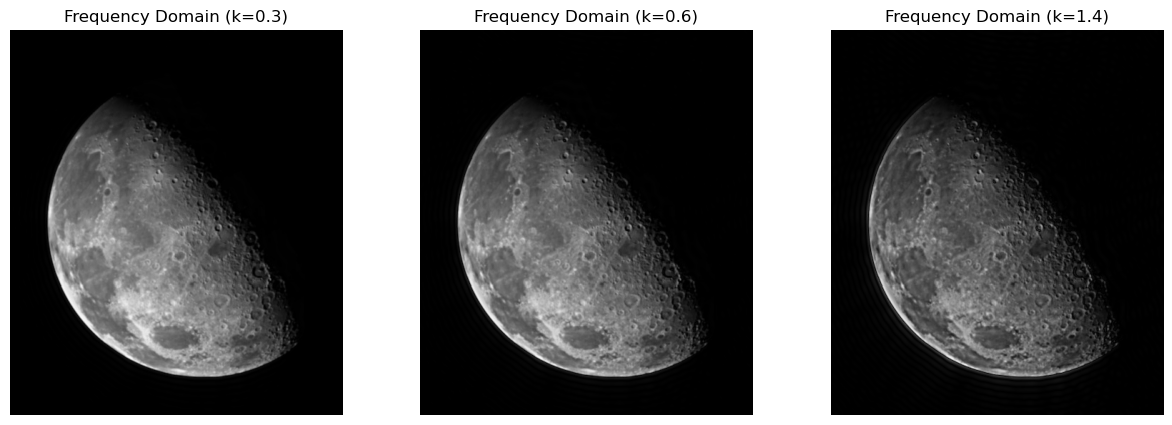

In [ ]:
freq_results = []
D0 = 30  
plt.figure(figsize=(15, 5))
for i, k in enumerate(ks):
    freq_img = unsharp_masking_freq(img, k, D0)
    freq_results.append(freq_img)

    plt.subplot(1, 3, i + 1)
    plt.title(f'Frequency Domain (k={k})')
    plt.imshow(freq_img, cmap='gray')
    plt.axis('off')

plt.show()


Comparing Spatial vs Frequency Domain results

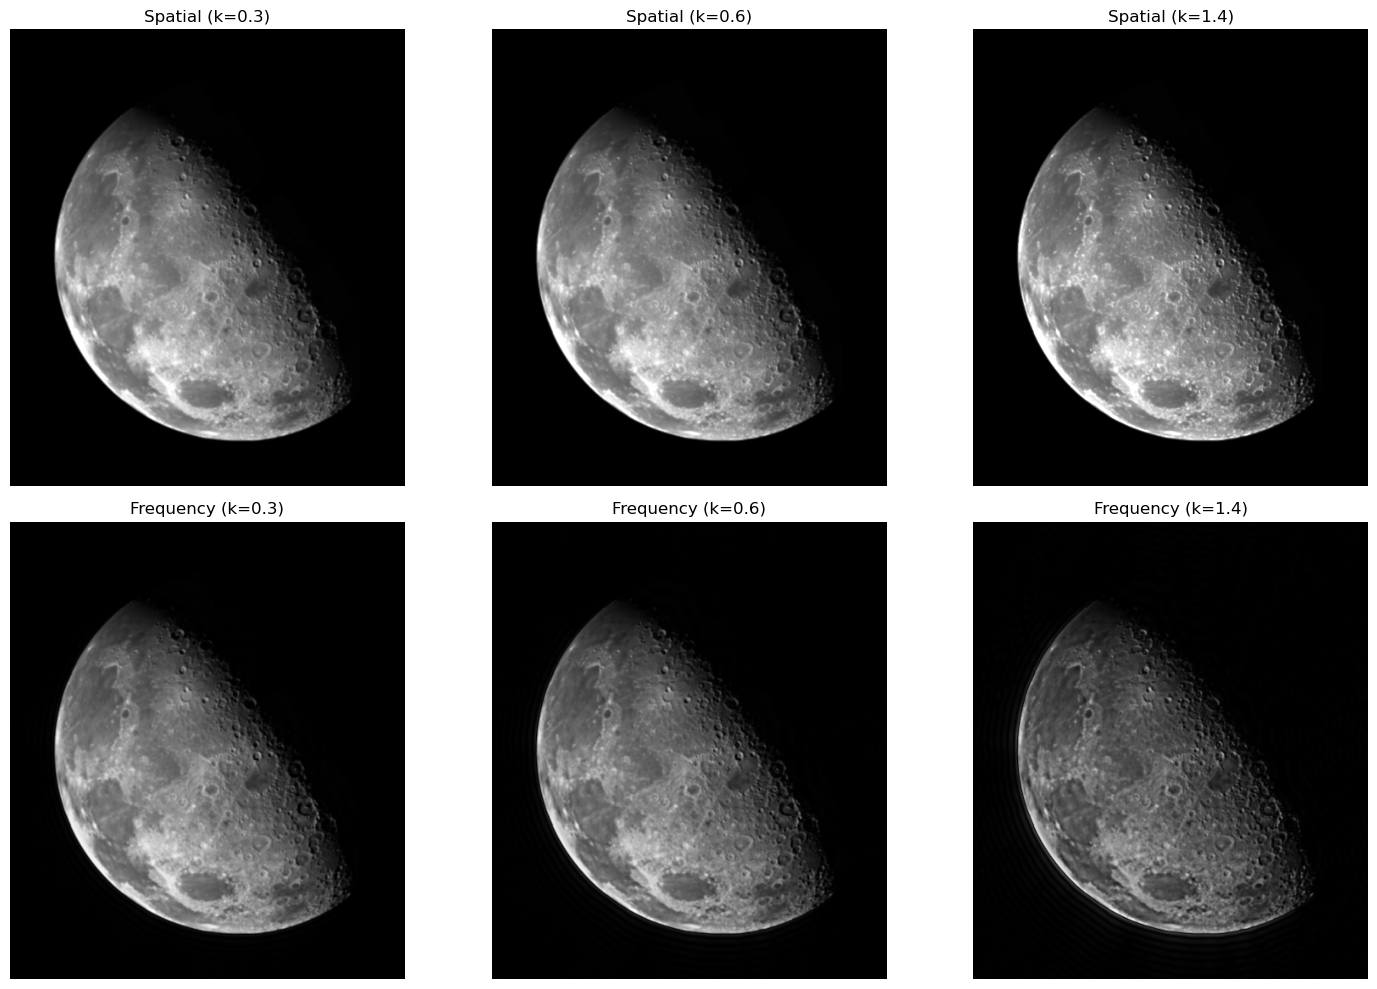

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(len(ks)):
    plt.subplot(2, 3, i + 1)
    plt.title(f'Spatial (k={ks[i]})')
    plt.imshow(spatial_results[i], cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, i + 4)
    plt.title(f'Frequency (k={ks[i]})')
    plt.imshow(freq_results[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


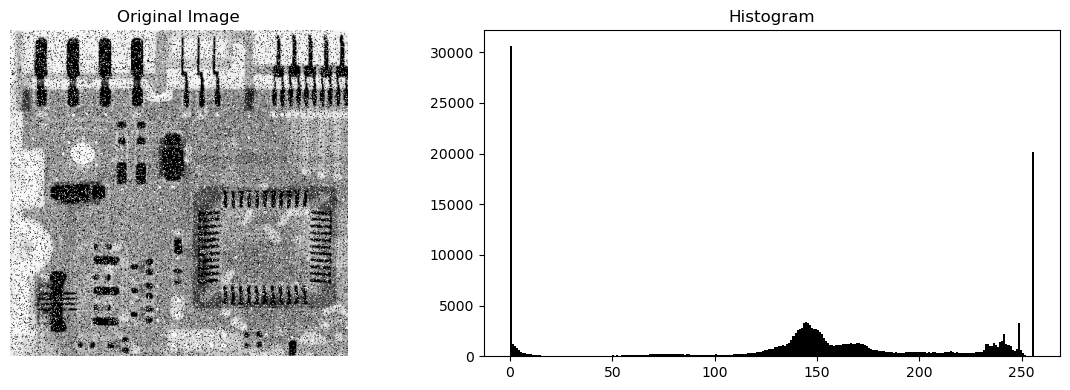

In [ ]:
img = cv2.imread('pcb.tif', cv2.IMREAD_GRAYSCALE)


# Step 2: Display original image and its histogram
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Histogram")
plt.hist(img.ravel(), bins=256, range=(0, 256), color='black')
plt.tight_layout()
plt.show()

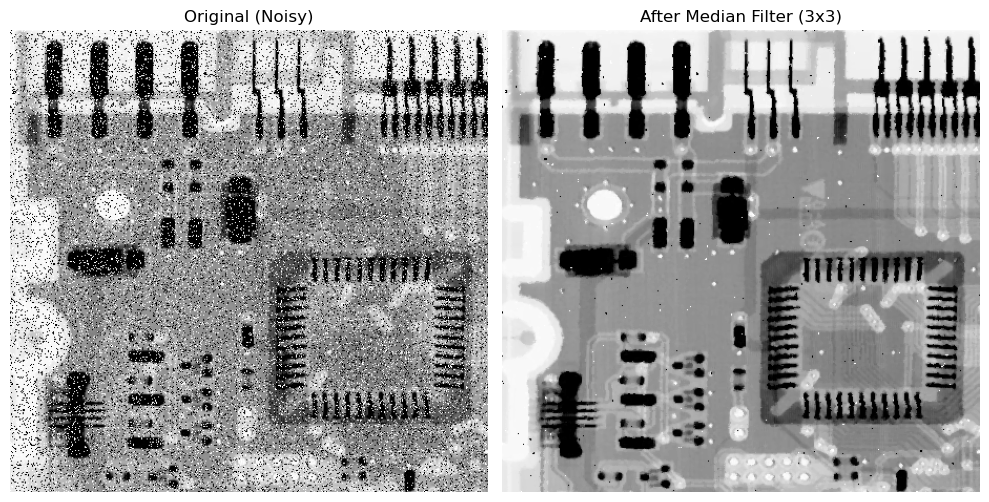

In [ ]:
denoised_img = cv2.medianBlur(img, 3)  # Kernel size 3x3

# Display original and denoised images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original (Noisy)")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("After Median Filter (3x3)")
plt.imshow(denoised_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Noise type: I've identified salt-pepper noise by checking the histogram and sharp pixel contrast in the image

Filter choice: Median filtering is best for this noise because I think it replaces each pixel with the median of its neighborhood preserving edges while removing isolated noise pixels

Result: Cleaned the image with amazingly reduced 

For the last problem as always first we load the image and convert it to grayscale then we should ask: 

"The average brightness" (mean)
"How much the brightness varies" (standard dev.)
The minimum and maximum brightness values
Lastly a histogram that shows how many pixels have each brightness level.

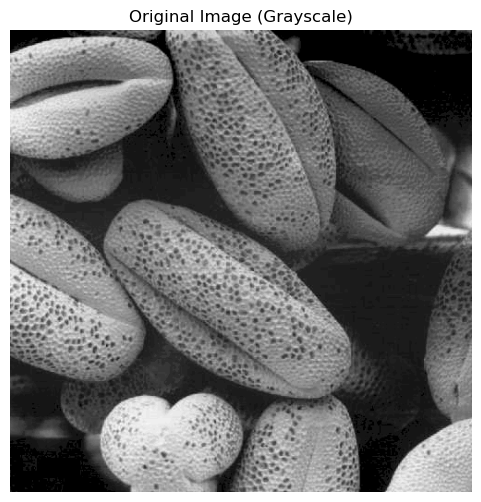

In [ ]:
#Standard libraries we used all the time in this project
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image_path = "pollen.tif"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(original_image, cmap='gray')
plt.title("Original Image (Grayscale)")
plt.axis("off")
plt.show()


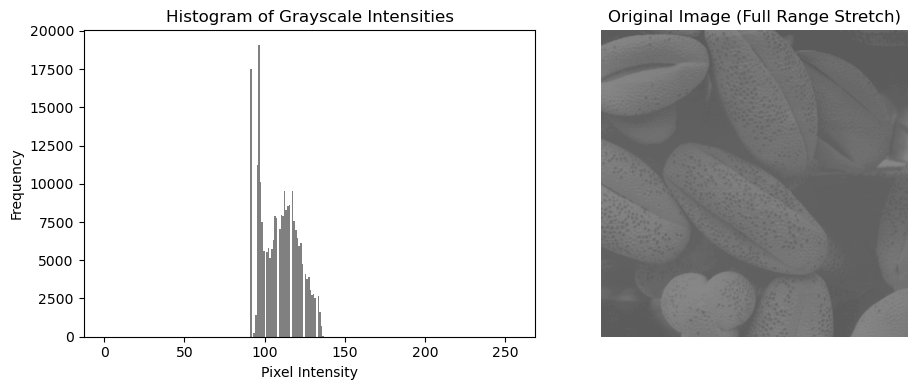

Mean Intensity: 109.079976
Standard Deviation: 11.489510861626094
Min Intensity: 91
Max Intensity: 138


In [ ]:

# Analyze statistics
mean_intensity = np.mean(original_image)
std_intensity = np.std(original_image)
min_intensity = np.min(original_image)
max_intensity = np.max(original_image)

# Histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(original_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram of Grayscale Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image (Full Range Stretch)")
plt.axis('off')
plt.tight_layout()
plt.show()

print("Mean Intensity:", mean_intensity)
print("Standard Deviation:", std_intensity)
print("Min Intensity:", min_intensity)
print("Max Intensity:", max_intensity)


Now we have all the answers we looked for in the above thanks to using np and matplot libs. And from this we must realize that the image doesn't use the full range of brightness which equals it's low contrast.

As a 1st solution we can use histogram equzation

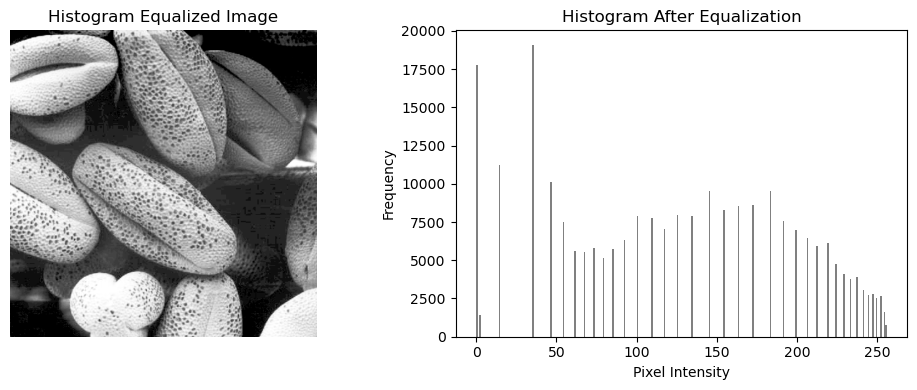

Mean: 122.676696 Std Dev: 77.39039673320963 Min: 0 Max: 255


In [ ]:

equalized_image = cv2.equalizeHist(original_image)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogram After Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Stats
eq_mean = np.mean(equalized_image)
eq_std = np.std(equalized_image)
eq_min = np.min(equalized_image)
eq_max = np.max(equalized_image)
print("Mean:", eq_mean, "Std Dev:", eq_std, "Min:", eq_min, "Max:", eq_max)


As a 2nd solution we can use a fancier equalizatoin technique: CLAHE which means Contrast Limited Adaptive Histogram Equalization. 
Basically, it does the same thing as the first fix, but it does it in "small regions" of the image instead of the whole thing. It also stops things from getting too bright or too dark.

This often gives better results, especially when you want to bring out small details without making the whole image look crazy.

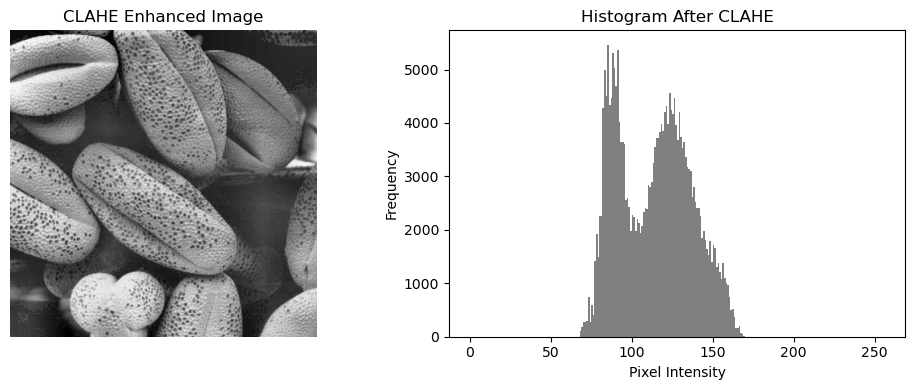

Mean: 113.481952 Std Dev: 22.566382480798644 Min: 68 Max: 169


In [ ]:

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(original_image)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(clahe_image, cmap='gray')
plt.title("CLAHE Enhanced Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(clahe_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogram After CLAHE")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Stats
cl_mean = np.mean(clahe_image)
cl_std = np.std(clahe_image)
cl_min = np.min(clahe_image)
cl_max = np.max(clahe_image)
print("Mean:", cl_mean, "Std Dev:", cl_std, "Min:", cl_min, "Max:", cl_max)
